# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import json
import requests as req
import random
import seaborn as sns
import math as math
import openweathermapy as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#import datetime to label the graphs
from datetime import datetime

In [2]:
# Save config information
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"


In [3]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

In [5]:
len(cities)

631

### Perform API Calls

* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}

# Initialize data frame to store data from API calls
WeatherData_df =pd.DataFrame(columns = ["City","Cloudiness", "Country", "Date",
                                        "Humidity","Lat","Lng",
                                         "Max Temp", "Wind Speed", 
                                        ])

In [8]:
# count the number of calls to API
count = 1 

# error count to null data values from the api extract
err = 0 

#number of call sets
sets = 0 

# index for the data frame
index = 0 

#Get current time
t0 =time.time()

print(f'Beginning Data Retrieval \n _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')

for city in cities:
    try:
        # remove space in city name so the URL retrieved is not broken.
        city1 = city.replace(" ", "%20") 
        
        print(f'Processing Record {count} of Set {sets} | {city}' )
        print(f'{owm.BASE_URL}weather?q={city1}&units=imperial&APPID={api_key}')
        city_stats = owm.get_current(city, **settings)
        
        WeatherData_df.set_value(index, "City", city_stats["name"])
        WeatherData_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherData_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherData_df.set_value(index, "Date", city_stats("dt"))
        WeatherData_df.set_value(index, "Humidity", city_stats("main.humidity"))
        WeatherData_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherData_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherData_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherData_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        
        index = index +1 
    except Exception as e:
        print(e)
    #except KeyError:
        #print("City not found. Skipping...")

        err= err+1
    count = count+1
    if count == 51: # Weather App API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("end of stats loop")
print(f'\n _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')
print(f'\n Data Retrieval Complete \n _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _')
print(f'\n Could not get data for {err} cities')


Beginning Data Retrieval 
 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _
Processing Record 1 of Set 0 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?q=bandarbeyla&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 2 of Set 0 | upernavik
http://api.openweathermap.org/data/2.5/weather?q=upernavik&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a


/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/pragathismacbookpro/anaconda3/envs/PythonData/lib/python3.6/site-

Processing Record 3 of Set 0 | finnsnes
http://api.openweathermap.org/data/2.5/weather?q=finnsnes&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 4 of Set 0 | gambela
http://api.openweathermap.org/data/2.5/weather?q=gambela&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 5 of Set 0 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?q=longyearbyen&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 6 of Set 0 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?q=attawapiskat&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
HTTP Error 404: Not Found
Processing Record 7 of Set 0 | hermanus
http://api.openweathermap.org/data/2.5/weather?q=hermanus&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 8 of Set 0 | rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 9 of Set 0 | drakino
http://api.

Processing Record 6 of Set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?q=butaritari&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 7 of Set 1 | grand river south east
http://api.openweathermap.org/data/2.5/weather?q=grand%20river%20south%20east&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
HTTP Error 404: Not Found
Processing Record 8 of Set 1 | parana
http://api.openweathermap.org/data/2.5/weather?q=parana&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 9 of Set 1 | santiago de cuba
http://api.openweathermap.org/data/2.5/weather?q=santiago%20de%20cuba&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 10 of Set 1 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?q=mys%20shmidta&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
HTTP Error 404: Not Found
Processing Record 11 of Set 1 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?q=guerrero%20negro&units=imperi

Processing Record 10 of Set 2 | sihor
http://api.openweathermap.org/data/2.5/weather?q=sihor&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 11 of Set 2 | floro
http://api.openweathermap.org/data/2.5/weather?q=floro&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 12 of Set 2 | kanepi
http://api.openweathermap.org/data/2.5/weather?q=kanepi&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 13 of Set 2 | kiboga
http://api.openweathermap.org/data/2.5/weather?q=kiboga&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 14 of Set 2 | nizhniy kuranakh
http://api.openweathermap.org/data/2.5/weather?q=nizhniy%20kuranakh&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 15 of Set 2 | jamestown
http://api.openweathermap.org/data/2.5/weather?q=jamestown&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 16 of Set 2 | saleaula
http://api.openweathermap.org/data/2.5/we

Processing Record 14 of Set 3 | aykhal
http://api.openweathermap.org/data/2.5/weather?q=aykhal&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 15 of Set 3 | samusu
http://api.openweathermap.org/data/2.5/weather?q=samusu&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
HTTP Error 404: Not Found
Processing Record 16 of Set 3 | east london
http://api.openweathermap.org/data/2.5/weather?q=east%20london&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 17 of Set 3 | nouadhibou
http://api.openweathermap.org/data/2.5/weather?q=nouadhibou&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 18 of Set 3 | tamiahua
http://api.openweathermap.org/data/2.5/weather?q=tamiahua&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 19 of Set 3 | miranda de ebro
http://api.openweathermap.org/data/2.5/weather?q=miranda%20de%20ebro&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 20 of Set 3 | po

Processing Record 17 of Set 4 | codrington
http://api.openweathermap.org/data/2.5/weather?q=codrington&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 18 of Set 4 | dolbeau
http://api.openweathermap.org/data/2.5/weather?q=dolbeau&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
HTTP Error 404: Not Found
Processing Record 19 of Set 4 | taoudenni
http://api.openweathermap.org/data/2.5/weather?q=taoudenni&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 20 of Set 4 | tabuk
http://api.openweathermap.org/data/2.5/weather?q=tabuk&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 21 of Set 4 | yumen
http://api.openweathermap.org/data/2.5/weather?q=yumen&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 22 of Set 4 | salalah
http://api.openweathermap.org/data/2.5/weather?q=salalah&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 23 of Set 4 | belushya guba
http://api.openweath

Processing Record 19 of Set 5 | ghanzi
http://api.openweathermap.org/data/2.5/weather?q=ghanzi&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 20 of Set 5 | rio verde de mato grosso
http://api.openweathermap.org/data/2.5/weather?q=rio%20verde%20de%20mato%20grosso&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 21 of Set 5 | lorengau
http://api.openweathermap.org/data/2.5/weather?q=lorengau&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 22 of Set 5 | victoria
http://api.openweathermap.org/data/2.5/weather?q=victoria&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 23 of Set 5 | lincoln
http://api.openweathermap.org/data/2.5/weather?q=lincoln&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 24 of Set 5 | sakakah
http://api.openweathermap.org/data/2.5/weather?q=sakakah&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
HTTP Error 404: Not Found
Processing Record 25 of 

Processing Record 23 of Set 6 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?q=leningradskiy&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 24 of Set 6 | kaitangata
http://api.openweathermap.org/data/2.5/weather?q=kaitangata&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 25 of Set 6 | zyryanka
http://api.openweathermap.org/data/2.5/weather?q=zyryanka&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 26 of Set 6 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?q=tasiilaq&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 27 of Set 6 | otradnoye
http://api.openweathermap.org/data/2.5/weather?q=otradnoye&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 28 of Set 6 | san martin
http://api.openweathermap.org/data/2.5/weather?q=san%20martin&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 29 of Set 6 | anloga
http://api.openweathe

Processing Record 26 of Set 7 | catuday
http://api.openweathermap.org/data/2.5/weather?q=catuday&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 27 of Set 7 | narsingi
http://api.openweathermap.org/data/2.5/weather?q=narsingi&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 28 of Set 7 | bara
http://api.openweathermap.org/data/2.5/weather?q=bara&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 29 of Set 7 | swinoujscie
http://api.openweathermap.org/data/2.5/weather?q=swinoujscie&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 30 of Set 7 | cayenne
http://api.openweathermap.org/data/2.5/weather?q=cayenne&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 31 of Set 7 | reinosa
http://api.openweathermap.org/data/2.5/weather?q=reinosa&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 32 of Set 7 | ohringen
http://api.openweathermap.org/data/2.5/weather?q=

Processing Record 29 of Set 8 | pacific grove
http://api.openweathermap.org/data/2.5/weather?q=pacific%20grove&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 30 of Set 8 | saldanha
http://api.openweathermap.org/data/2.5/weather?q=saldanha&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 31 of Set 8 | parabel
http://api.openweathermap.org/data/2.5/weather?q=parabel&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 32 of Set 8 | zhezkazgan
http://api.openweathermap.org/data/2.5/weather?q=zhezkazgan&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 33 of Set 8 | viedma
http://api.openweathermap.org/data/2.5/weather?q=viedma&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 34 of Set 8 | zheleznodorozhnyy
http://api.openweathermap.org/data/2.5/weather?q=zheleznodorozhnyy&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 35 of Set 8 | half moon bay
http://a

Processing Record 32 of Set 9 | camacari
http://api.openweathermap.org/data/2.5/weather?q=camacari&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 33 of Set 9 | saint-pacome
http://api.openweathermap.org/data/2.5/weather?q=saint-pacome&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
HTTP Error 404: Not Found
Processing Record 34 of Set 9 | steamboat springs
http://api.openweathermap.org/data/2.5/weather?q=steamboat%20springs&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 35 of Set 9 | ouallam
http://api.openweathermap.org/data/2.5/weather?q=ouallam&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 36 of Set 9 | san cristobal
http://api.openweathermap.org/data/2.5/weather?q=san%20cristobal&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 37 of Set 9 | sayyan
http://api.openweathermap.org/data/2.5/weather?q=sayyan&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 38 o

Processing Record 34 of Set 10 | juba
http://api.openweathermap.org/data/2.5/weather?q=juba&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 35 of Set 10 | marzuq
http://api.openweathermap.org/data/2.5/weather?q=marzuq&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 36 of Set 10 | digby
http://api.openweathermap.org/data/2.5/weather?q=digby&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 37 of Set 10 | altay
http://api.openweathermap.org/data/2.5/weather?q=altay&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 38 of Set 10 | belmonte
http://api.openweathermap.org/data/2.5/weather?q=belmonte&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 39 of Set 10 | tuggurt
http://api.openweathermap.org/data/2.5/weather?q=tuggurt&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
HTTP Error 404: Not Found
Processing Record 40 of Set 10 | ghedi
http://api.openweathermap.org/data/2.

Processing Record 37 of Set 11 | keti bandar
http://api.openweathermap.org/data/2.5/weather?q=keti%20bandar&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 38 of Set 11 | omboue
http://api.openweathermap.org/data/2.5/weather?q=omboue&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 39 of Set 11 | kargopol
http://api.openweathermap.org/data/2.5/weather?q=kargopol&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 40 of Set 11 | salinopolis
http://api.openweathermap.org/data/2.5/weather?q=salinopolis&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 41 of Set 11 | japura
http://api.openweathermap.org/data/2.5/weather?q=japura&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 42 of Set 11 | wufeng
http://api.openweathermap.org/data/2.5/weather?q=wufeng&units=imperial&APPID=a2d9969b9dfd86d49bf8c9a259e6496a
Processing Record 43 of Set 11 | sao domingos
http://api.openweathermap.or

In [9]:
WeatherData_df.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Export the city data into a .csv.
WeatherData_df.to_csv("WeatherData.csv", encoding='utf-8', index=False)


In [12]:
#Display the DataFrame
WeatherData_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bandarbeyla,100,SO,1559254225,85,9.49,50.81,76.22,8.63
1,Upernavik,0,GL,1559254447,83,72.79,-56.15,32.48,4.41
2,Finnsnes,100,NO,1559254447,81,69.23,17.98,44.6,18.34
3,Gambela,100,ET,1559254447,78,8.25,34.59,70.64,4.61
4,Longyearbyen,75,NO,1559254448,69,78.22,15.63,33.8,28.86


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

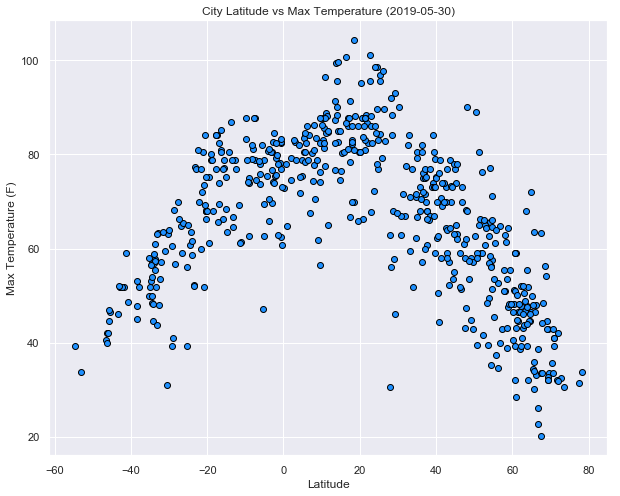

In [15]:
plt.figure(figsize=(10,8))
sns.set()


plt.scatter(WeatherData_df["Lat"], WeatherData_df["Max Temp"], color='dodgerblue',edgecolor='black', alpha=1)

#plt.ylim(20,101)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.now().date()})')

#plt.savefig("../Images/avg_state_rain.png")
plt.savefig("../Images/Latitude_Vs_Temperature.png")
plt.show()
#plt.grid()

#### Latitude vs. Humidity Plot

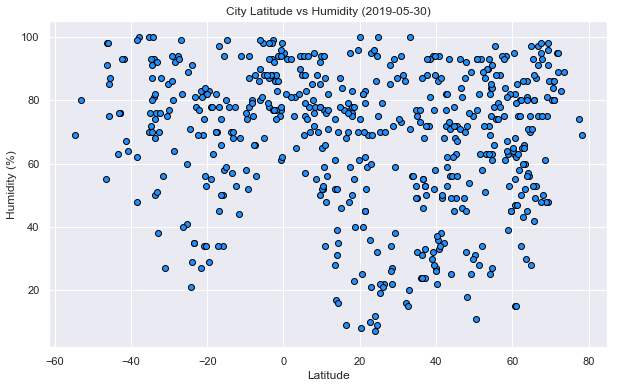

In [17]:
plt.figure(figsize=(10,6))
sns.set()

plt.scatter(WeatherData_df["Lat"], WeatherData_df["Humidity"], color='dodgerblue',edgecolor='black', alpha=1)

plt.ylim(2,105)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.now().date()})')

plt.savefig("../Images/Latitude_Vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

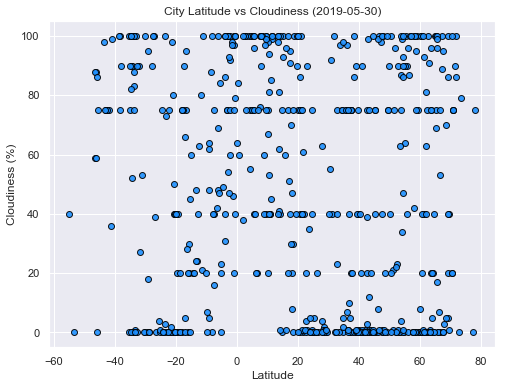

In [18]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherData_df["Lat"], WeatherData_df["Cloudiness"], color='dodgerblue',edgecolor='black', alpha=0.9)

plt.ylim(-5,(WeatherData_df["Cloudiness"].max()+5))

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.now().date()})')

plt.savefig("../Images/Latitude_Vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

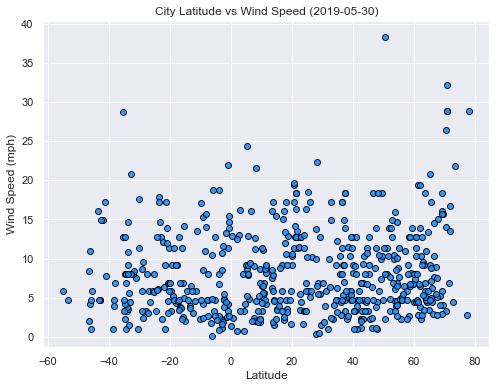

In [19]:
plt.figure(figsize=(8,6))
sns.set()
plt.scatter(WeatherData_df["Lat"], WeatherData_df["Wind Speed"], color='dodgerblue',edgecolor='black', alpha=0.9)

plt.ylim((WeatherData_df["Wind Speed"].min()-1.5),(WeatherData_df["Wind Speed"].max()+2))

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.now().date()})')

plt.savefig("../Images/Latitude_Vs_WindSpeed.png")
plt.show()